### Importación de datos



In [37]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [38]:
ventas_por_tienda = datos["Lugar de Compra"].value_counts()
print(ventas_por_tienda)


Lugar de Compra
Bogotá           3943
Medellín         2314
Cali             1007
Pereira           517
Barranquilla      310
Cartagena         242
Cúcuta            186
Bucaramanga       181
Riohacha          163
Santa Marta       151
Leticia           142
Pasto              94
Manizales          41
Neiva              40
Villavicencio      29
Armenia            28
Soacha             19
Inírida            14
Valledupar         14
Name: count, dtype: int64


In [39]:
datos["Ingreso"] = datos["Precio"] - datos["Costo de envío"]

# 2. Ventas por categoría

In [59]:
# Crear una nueva columna de ingreso por venta
datos["Ingreso"] = datos["Precio"] - datos["Costo de envío"]

# Calcular ingreso total por tienda y ordenarlo de mayor a menor
ingresos_por_tienda = datos.groupby("Lugar de Compra")["Ingreso"].sum().sort_values(ascending=False)

# Mostrar el resultado
print(ingresos_por_tienda)



Lugar de Compra
Bogotá           1.718128e+09
Medellín         1.038167e+09
Cali             4.796122e+08
Pereira          2.139270e+08
Barranquilla     1.250059e+08
Cartagena        9.689820e+07
Cúcuta           9.405000e+07
Bucaramanga      8.572430e+07
Riohacha         6.994690e+07
Leticia          6.355480e+07
Santa Marta      5.026890e+07
Pasto            4.640100e+07
Neiva            1.978960e+07
Manizales        1.834500e+07
Villavicencio    1.260570e+07
Soacha           1.165710e+07
Armenia          1.160260e+07
Inírida          7.660100e+06
Valledupar       5.578000e+06
Name: Ingreso, dtype: float64


# 3. Calificación promedio de la tienda


In [53]:

# Calcular promedio de calificaciones por tienda
calificaciones_promedio = datos.groupby("Lugar de Compra")["Calificación"].mean().sort_values(ascending=False)

print(calificaciones_promedio)



Lugar de Compra
Pasto            4.148936
Bogotá           4.113619
Valledupar       4.071429
Cali             4.046673
Cartagena        4.020661
Pereira          4.013540
Bucaramanga      3.977901
Cúcuta           3.940860
Medellín         3.926534
Leticia          3.922535
Riohacha         3.895706
Soacha           3.894737
Villavicencio    3.827586
Barranquilla     3.803226
Neiva            3.800000
Inírida          3.642857
Manizales        3.634146
Santa Marta      3.596026
Armenia          3.464286
Name: Calificación, dtype: float64


# 4. Productos más y menos vendidos

In [45]:
# Contar productos por categoría y tienda
productos_por_categoria = datos.groupby(["Lugar de Compra", "Categoría del Producto"]).size().unstack()
print(productos_por_categoria)


Categoría del Producto  Artículos para el hogar  Deportes y diversión  \
Lugar de Compra                                                         
Armenia                                     3.0                   1.0   
Barranquilla                               29.0                  30.0   
Bogotá                                    297.0                 485.0   
Bucaramanga                                 6.0                  21.0   
Cali                                       72.0                 130.0   
Cartagena                                  21.0                  27.0   
Cúcuta                                     13.0                  16.0   
Inírida                                     NaN                   3.0   
Leticia                                     8.0                  25.0   
Manizales                                   4.0                   8.0   
Medellín                                  192.0                 249.0   
Neiva                                       1.0    

In [48]:
# Sumamos los valores de cada fila (cada tienda)
productos_totales_por_tienda = productos_por_categoria.sum(axis=1)

# Ordenamos de mayor a menor
productos_totales_ordenados = productos_totales_por_tienda.sort_values(ascending=False)

# Imprimimos el resultado
print(productos_totales_ordenados)


Lugar de Compra
Bogotá           3943.0
Medellín         2314.0
Cali             1007.0
Pereira           517.0
Barranquilla      310.0
Cartagena         242.0
Cúcuta            186.0
Bucaramanga       181.0
Riohacha          163.0
Santa Marta       151.0
Leticia           142.0
Pasto              94.0
Manizales          41.0
Neiva              40.0
Villavicencio      29.0
Armenia            28.0
Soacha             19.0
Inírida            14.0
Valledupar         14.0
dtype: float64


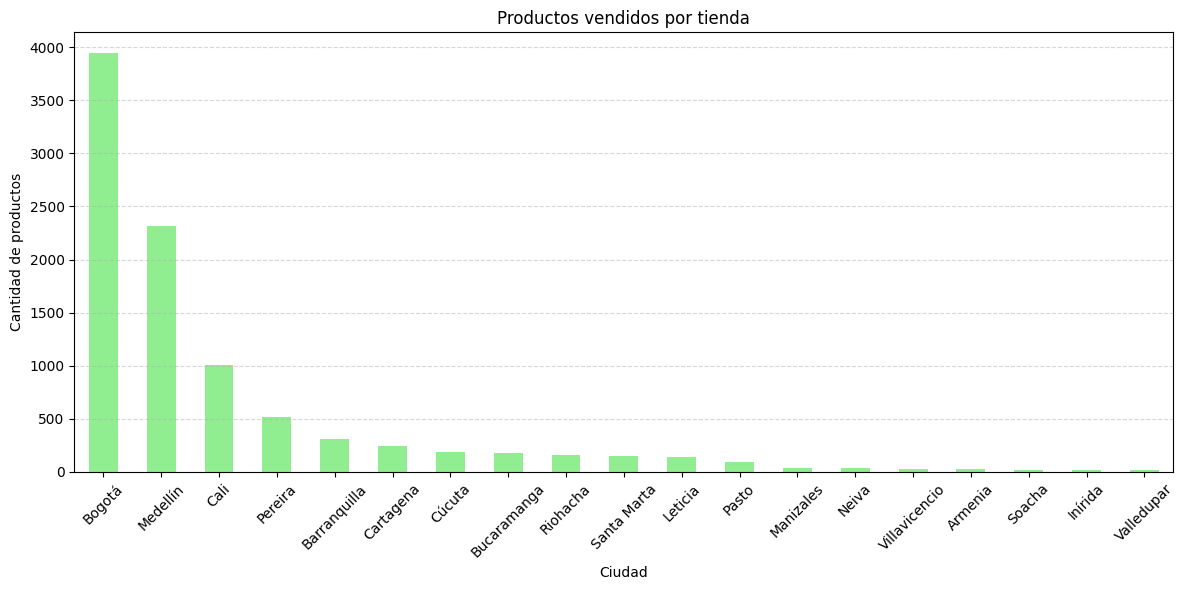

In [56]:
import matplotlib.pyplot as plt

# Gráfico de barras
productos_totales_ordenados.plot(kind='bar', figsize=(12,6), color='lightgreen')

plt.title("Productos vendidos por tienda")
plt.xlabel("Ciudad")
plt.ylabel("Cantidad de productos")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [54]:
# Calcular envío promedio por ciudad
envio_promedio = datos.groupby("Lugar de Compra")["Costo de envío"].mean().sort_values()

print(envio_promedio)


Lugar de Compra
Santa Marta      18752.317881
Valledupar       22021.428571
Cartagena        22638.429752
Barranquilla     22692.258065
Armenia          22867.857143
Pereira          23211.411992
Riohacha         24127.607362
Bogotá           24532.082171
Manizales        24948.780488
Villavicencio    25100.000000
Medellín         25282.022472
Leticia          25317.605634
Cali             26726.812314
Bucaramanga      26790.055249
Neiva            27710.000000
Pasto            27801.063830
Cúcuta           28597.311828
Inírida          30557.142857
Soacha           34768.421053
Name: Costo de envío, dtype: float64


<ipython-input-57-d8b8745df259>:7: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


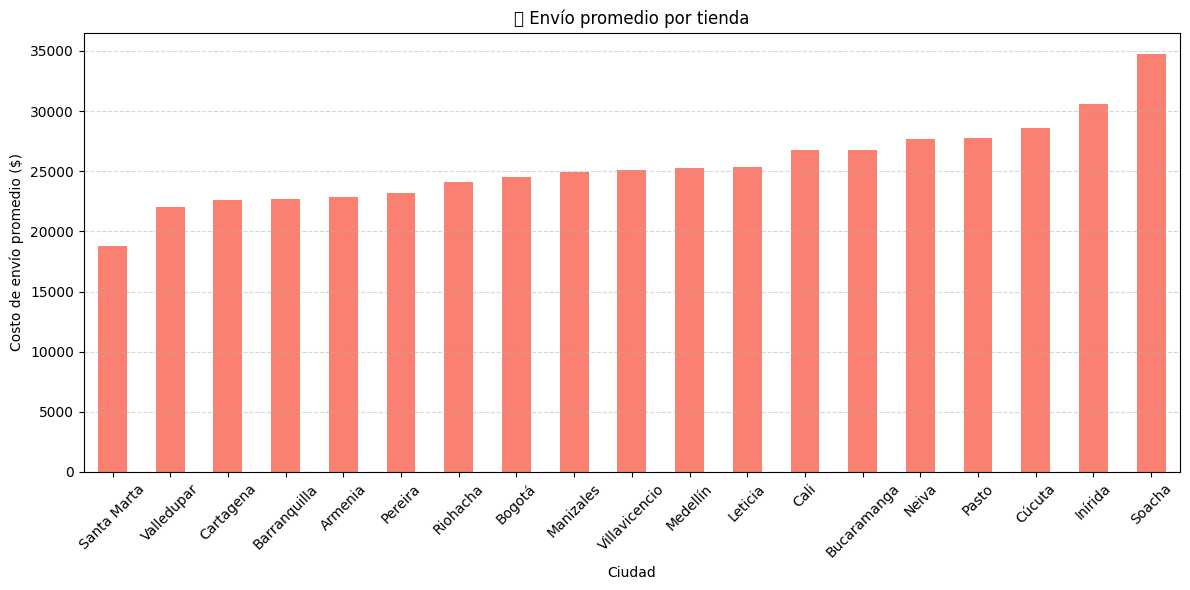

In [57]:
envio_promedio.plot(kind="bar", figsize=(12,6), color='salmon')
plt.title(" Envío promedio por tienda")
plt.xlabel("Ciudad")
plt.ylabel("Costo de envío promedio ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Recomendación para el Sr. Juan

Después de analizar los datos de ventas, productos y calificaciones de las tiendas Alura Store, se encontro una tienda que no está funcionando tan bien como las otras.

Recomendamos que el Sr. Juan venda la tienda de Armenia.
¿Por qué?:

1 Tiene ingresos muy bajos: solo 11 millones, mientras otras como Bogotá tienen más de 1.700 millones.

2 Se vendieron pocos productos: Armenia vendió solo 28 productos, mientras que en Bogotá se vendieron 3943.

3 La calificación promedio es baja: los clientes le dieron solo 3.46 estrellas, ¡es la más baja de todas las tiendas!

Aunque todas las tiendas ayudan al negocio, cerrar la tienda de Armenia podría ser una buena idea para que el Sr. Juan tenga más tiempo y dinero para comenzar su nuevo emprendimiento.